<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/AI_W9_FRI_31_03_CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
# Khai báo thư viện
from keras.datasets import cifar10
from keras.saving.legacy.save import load_model 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np 

In [155]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [156]:
# Chuyển đổi các nhãn ở đầu ra thành định dạng one-hot encoding (10 output)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [157]:
x_train = x_train.reshape(50000,32,32,3)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000,32,32,3)
x_test = x_test.astype('float32')/255

In [174]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [175]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['accuracy'])

In [176]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128)

test_loss, test_acc = model.evaluate(x_test,y_test)
print('Mất mát:',test_loss)
print('Độ chính xác',test_acc)

Epoch 1/10
391/391 [==============================] - 76s 193ms/step - loss: 1.4787 - accuracy: 0.4696
Epoch 2/10
391/391 [==============================] - 75s 191ms/step - loss: 1.1155 - accuracy: 0.6090
Epoch 3/10
391/391 [==============================] - 75s 192ms/step - loss: 0.9721 - accuracy: 0.6622
Epoch 4/10
391/391 [==============================] - 75s 192ms/step - loss: 0.8546 - accuracy: 0.7024
Epoch 5/10
391/391 [==============================] - 74s 188ms/step - loss: 0.7669 - accuracy: 0.7351
Epoch 6/10
391/391 [==============================] - 79s 203ms/step - loss: 0.6748 - accuracy: 0.7653
Epoch 7/10
391/391 [==============================] - 75s 192ms/step - loss: 0.5942 - accuracy: 0.7948
Epoch 8/10
391/391 [==============================] - 74s 190ms/step - loss: 0.5133 - accuracy: 0.8225
Epoch 9/10
391/391 [==============================] - 76s 195ms/step - loss: 0.4284 - accuracy: 0.8557
Epoch 10/10
313/313 [==============================] - 7s 21ms/step - los

In [178]:
model.save('test_cnn.h5')  #lưu file

In [179]:
model10 = load_model('test_cnn.h5')

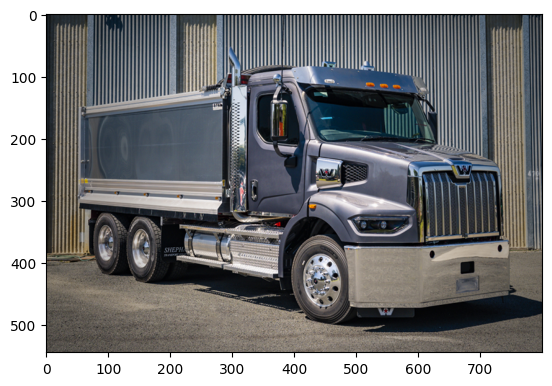

In [180]:
img = plt.imread('truck.jpg')
plt.imshow(img)
plt.show()

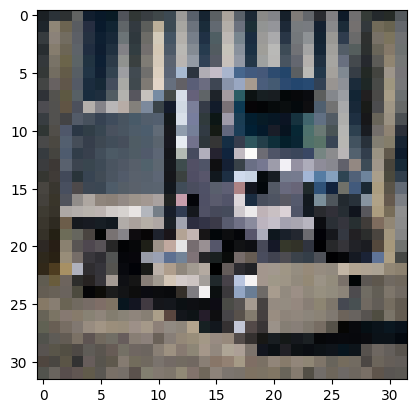

1/1 [==============================] - 0s 78ms/step
9
Label:  truck


In [181]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('truck.jpg', target_size = (32,32))  #target_size: chỉnh kích thước ảnh mong muốn

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')
img = img / 255

plt.imshow(img.reshape(32,32,3))
plt.show()

matrix = np.argmax(model.predict(img),axis = -1)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
temp = matrix[0]
print(temp)
print("Label: ", classes[temp])